# Research assignment 4


Emily Ernst

Sociodisasters: Differential Health Outcomes Before and After Climate Disasters

8 March, 2024

In [1]:
//downloading and merging data files form the CDC NHANES survey. This project will aim to determine ///
//differential access to hospitals / care across race, class and gender. This data has no geographic ///
//indicator, so this would be preliminary research into racial disparities (assumedly) pre-disaster///
//scenarios. AKA I have no way of knowing if a disaster occurred here or not, but, I could take ///
//a look at the health outcomes to capture health disparities existing in the U.S. unrelated to disasters.

//Survey documentation and data files are here: ///
//https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2017-2020
//(demographics with health data: hospitalization rates and access to care)

In [2]:
copy "https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.XPT" P_DEMO.XPT, replace
//https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&Cycle=2017-2020

In [3]:
copy https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_HUQ.XPT P_HUQ.XPT, replace

In [4]:
//loading the data from the demographics questionnaire: 
fdause P_DEMO.xpt, clear

In [5]:
describe


Contains data
 Observations:        15,560                  
    Variables:            29                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
seqn            double  %10.0g                Respondent sequence number
sddsrvyr        double  %10.0g                Data release cycle
ridstatr        double  %10.0g                Interview/Examination status
riagendr        double  %10.0g                Gender
ridageyr        double  %10.0g                Age in years at screening
ridagemn        double  %10.0g                Age in months at screening - 0 to
                                                24 mos
ridreth1        double  %10.0g                Race/Hispanic origin
ridreth3        double  %10.0g                Race/Hispanic origin w/ NH Asian
ridexmon  

In [6]:
codebook ridreth3


-------------------------------------------------------------------------------
ridreth3                                       Race/Hispanic origin w/ NH Asian
-------------------------------------------------------------------------------

                  Type: Numeric (double)

                 Range: [1,7]                         Units: 1
         Unique values: 6                         Missing .: 0/15,560

            Tabulation: Freq.  Value
                        1,990  1
                        1,544  2
                        5,271  3
                        4,098  4
                        1,638  6
                        1,019  7


In [7]:
/*
1	Mexican American	1990	1990	
2	Other Hispanic	1544	3534	
3	Non-Hispanic White	5271	8805	
4	Non-Hispanic Black	4098	12903	
6	Non-Hispanic Asian	1638	14541	
7	Other Race - Including Multi-Racial	1019	15560	
.	Missing */
gen race="Mexican American" if ridreth3==1 
replace race="Other Hispanic" if ridreth3==2 
replace race="Non-Hispanic White" if ridreth3==3 
replace race="Non-Hispanic Black" if ridreth3==4
replace race="Non-Hispanic Asian" if ridreth3==6
replace race="Other Race - Including Multi-Racial" if ridreth3==7

(13,570 missing values generated)
(1,544 real changes made)
variable race was str16 now str18
(5,271 real changes made)
(4,098 real changes made)
(1,638 real changes made)
variable race was str18 now str35
(1,019 real changes made)


In [8]:
codebook race


-------------------------------------------------------------------------------
race                                                                (unlabeled)
-------------------------------------------------------------------------------

                  Type: String (str35)

         Unique values: 6                         Missing "": 0/15,560

            Tabulation: Freq.  Value
                        1,990  "Mexican American"
                        1,638  "Non-Hispanic Asian"
                        4,098  "Non-Hispanic Black"
                        5,271  "Non-Hispanic White"
                        1,544  "Other Hispanic"
                        1,019  "Other Race - Including Multi-Racial"



In [9]:
save p_demo.xpt, replace

file p_demo.xpt saved as .dta format


In [10]:
//loading the data from the hospitalization and access to healthcare questionnaire: 
//CODEBOOK: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_HUQ.htm
//The Hospital Utilization and Access to Care questionnaire (variable name prefix HUQ) provides ///
//respondent-level interview data on self-reported health status and access to health care topics.
fdause P_HUQ, clear

In [11]:
describe


Contains data
 Observations:        15,560                  
    Variables:             7                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
seqn            double  %10.0g                Respondent sequence number
huq010          double  %10.0g                General health condition
huq030          double  %10.0g                Routine place to go for
                                                healthcare
huq051          double  %10.0g                #times receive healthcare over
                                                past year
hud062          double  %10.0g                How long since last healthcare
                                                visit
huq071          double  %10.0g                Overnight hospital patient in
              

In [12]:
//mergin' the data

In [13]:
merge 1:1 seqn using p_demo, nogen


    Result                      Number of obs
    -----------------------------------------
    Not matched                             0
    Matched                            15,560  
    -----------------------------------------


In [14]:
describe


Contains data
 Observations:        15,560                  
    Variables:            35                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
seqn            double  %10.0g                Respondent sequence number
huq010          double  %10.0g                General health condition
huq030          double  %10.0g                Routine place to go for
                                                healthcare
huq051          double  %10.0g                #times receive healthcare over
                                                past year
hud062          double  %10.0g                How long since last healthcare
                                                visit
huq071          double  %10.0g                Overnight hospital patient in
              

In [15]:
ds ridreth3 riagendr dmdeduc2 indfmpir huq010 huq051 hud062 huq071 huq090 
//recoding the variables of interest
gen race=ridreth3
gen gender=riagendr
gen educ=dmdeduc2
gen familyincome=indfmpir
gen hlthstatus=huq010
gen hlthcarefreq=huq051
gen hspitalvisit=hud062
gen hspitalovrnight=huq071
gen mental_health=huq090

ridreth3  dmdeduc2  huq010    hud062    huq090
riagendr  indfmpir  huq051    huq071
(6,328 missing values generated)
(2,201 missing values generated)
(13,540 missing values generated)
(1,724 missing values generated)


In [16]:
codebook hspitalvisit hlthcarefreq hspitalvisit hspitalovrnight mental_health


-------------------------------------------------------------------------------
hspitalvisit                                                        (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,99]                        Units: 1
         Unique values: 6                         Missing .: 13,540/15,560

            Tabulation: Freq.  Value
                           69  0
                          379  1
                          749  2
                          559  3
                          251  4
                           13  99
                       13,540  .

-------------------------------------------------------------------------------
hlthcarefreq                                                        (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0

In [17]:
ds race gender educ familyincome hlthstatus hlthcarefreq hspitalvisit hspitalovrnight mental_health ridageyr

race          educ          hlthstatus    hspitalvisit  mental_hea~h
gender        familyincome  hlthcarefreq  hspitalovr~t  ridageyr


In [18]:
tab hlthcarefreq


hlthcarefre |
          q |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,020       12.98       12.98
          1 |      3,345       21.50       34.48
          2 |      5,009       32.19       66.67
          3 |      2,389       15.35       82.02
          4 |      1,006        6.47       88.49
          5 |        421        2.71       91.20
          6 |        677        4.35       95.55
          7 |        207        1.33       96.88
          8 |        446        2.87       99.74
         99 |         40        0.26      100.00
------------+-----------------------------------
      Total |     15,560      100.00


In [19]:
//cleaning missing values
replace hlthcarefreq=. if huq051==99

(40 real changes made, 40 to missing)


In [20]:
label define hlthcarefreq 0 "0" 1 "1" 2 "2-3" 3 "4-5" 4 "6-7" 5 "8-9" 6 "10-12" 7 "13-15" 8 "16+"

In [21]:
label variable hlthcarefreq "# of times received health care in the past year" 

In [22]:
label values hlthcarefreq hlthcarefreq

In [23]:
codebook hlthcarefreq


-------------------------------------------------------------------------------
hlthcarefreq                   # of times received health care in the past year
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: hlthcarefreq, but 2 nonmissing values are not labeled

                 Range: [0,8]                         Units: 1
         Unique values: 9                         Missing .: 40/15,560

            Tabulation: Freq.   Numeric  Label
                        2,020         0  
                        3,345         1  
                        5,009         2  2-3
                        2,389         3  4-5
                        1,006         4  6-7
                          421         5  8-9
                          677         6  10-12
                          207         7  13-15
                          446         8  16+
                           40         .  


In [24]:
encode hlthcarefreq

not possible with numeric variable
r(107);


In [ ]:
tab gender

In [26]:
label define gender 1 "male" 2 "female"

In [27]:
label values gender gender

In [28]:
label define race 1 "Mexican American" 2 "Other Hispanic" 3 "Non-Hispanic White" 4 "Non-Hispanic Black" ///
6 "Non-Hispanic Asian" 7 "Other Race" 

In [29]:
label values race race

In [ ]:
codebook race

In [ ]:
codebook gender

## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

*all the examples we had today, the dependent var was I-R, but they can be nominal

A. Write at least one hypothesis involving one of the two following types of interactions
        1) nominal * nominal: raceXsex
        2) nominal * interval-ratio
    Dependent: Healthcare access (varies)
        - hlthcarefreq (ordinal)
        - hspitalovrnight (nominal- dummy)
        - hspitalvisit (ordinal)
        - mental_health (nominal- dummy)
    Independent: 
    Health Status (ordinal), Race (nominal), Gender (nominal), Class 
    (nominal), Age (IR)
        
        H1: The level of access to healthcare measured by hlthcarefreq (the amount of times someone 
            accessed healthcare in the last year) will be associated with a positive correlation with             subjective health status, all things held constant 
        H1a: The level of access to healthcare will have a stronger positive correlation 
             with subjective health status for Black, lower SES women than white higher SES men.
    
        
    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves
        
      - race
      - sex
      
        2) the interaction of the 2 indendent variables
        
          I predict that access to health care and mental health care will have positive associations 
          with subjective health status, but will have a greater association when accounting for  
          race, class and gender and the intersections between them.
          
        
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each 
    of your predictions
    
    According to the literature, access (or inadequate access) to health care significantly impedes 
    recovery post-disaster and exacerbates existing inequalities. Indicators of healthcare 
    access can be predicted by subjective health status and disaster-related injuries (Han and Suh, 
    2023). Thus, I think the better the subjective health status the more hosptial visits the 
    individual has obtained in the last year. However, race, class and gender are important  
    predictive factors of health disparities experienced post-disaster, and likely have an affect 
    on individual health care access. Therefore, intersectional approaches towards understanding 
    disaster recovery are important for encompassing differential health outcomes (Reid, 2013). To 
    understand the differential experiences in disasters, I will test the interactive 
    relationship between one's intersectional location (accounting for race and gender) on reported 
    subjective health in hopes to better predict its correlation to health access.

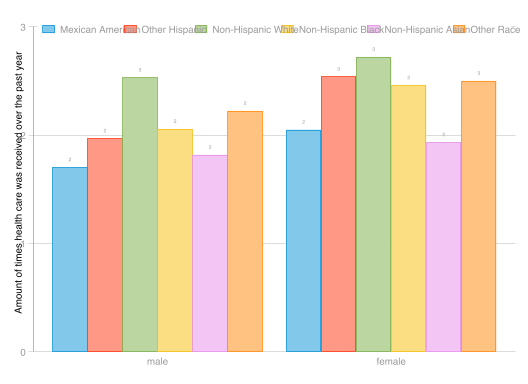

In [30]:
graph bar hlthcarefreq, over(race) over(gender) asyvars ytitle (Amount of times health care was received over the past year) ///
  blabel(bar, format(%7.0fc)) legend(rows(1) position(1) ring(0)) scheme(538w)

## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate 1 model with uninteracted variables and 1 model with interacted variables. Use --esttab-- to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values

H1: hlthcarefreq hlthstatus
H1a: hlthcare freq hlthstatus ib3.race ib1.sex ib4.race ib2.sex

In [31]:
//H1
quietly eststo: reg hlthcarefreq hlthstatus

In [ ]:
//H2

In [32]:
//creating interaction estimates for white men and Black women
quietly {
set line 140
gen white= race==3
gen black= race==4
gen female= gender==2
gen male= gender==1
gen whitexfemale = white * female
gen blackxfemale = black * female
gen whitexmale = white * male
}

In [52]:
gen raceXsex="white male" if race==3 & gender==1
replace raceXsex="white female" if race==3 & gender==2
replace raceXsex="Black male" if race==4 & gender==1
replace raceXsex="Black female" if race==4 & gender==2

(12,913 missing values generated)
variable raceXsex was str10 now str12
(2,624 real changes made)
(2,024 real changes made)
(2,074 real changes made)


In [53]:
encode raceXsex, gen(raceBYsex)

In [63]:
//when ur running the regression, treat these categorical variables as categorical. ib2.sex would be female, ///
// if you wanted to show the coefficient for female, then you would want to omit ib1.sex (male)
est clear
quietly eststo: reg hlthcarefreq hlthstatus i.race i.gender
quietly eststo: reg hlthcarefreq hlthstatus ib3.raceBYsex

In [64]:
esttab


--------------------------------------------
                      (1)             (2)   
             hlthcarefreq    hlthcarefreq   
--------------------------------------------
hlthstatus          0.385***        0.432***
                  (29.87)         (25.39)   

1.race                  0                   
                      (.)                   

2.race              0.416***                
                   (6.96)                   

3.race              0.888***                
                  (19.07)                   

4.race              0.462***                
                   (9.59)                   

6.race              0.154**                 
                   (2.62)                   

7.race              0.628***                
                   (9.23)                   

1.gender                0                   
                      (.)                   

2.gender            0.278***                
                   (9.83)                   



In [39]:
/*esttab stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(%10.0fc)) se(fmt(%6.0fc) par) N (fmt(%10.0fc)) r2 (fmt(%10.2f))) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Race, Gender" "H1a.: RaceXGender") ///
  coeflabels (4.race "Black" 1.race "Mexican American" 2.race "Other Hispanic" 3.race "Non-Hispanic White" ///
  6.race "Non-Hispanic Asian" 1.gender "Male" 2.gender "Female" blackxfemale "Black female" /// 
  whitexmale "white Male")*/

type mismatch
r(109);



Variables that uniquely identify margins: race gender


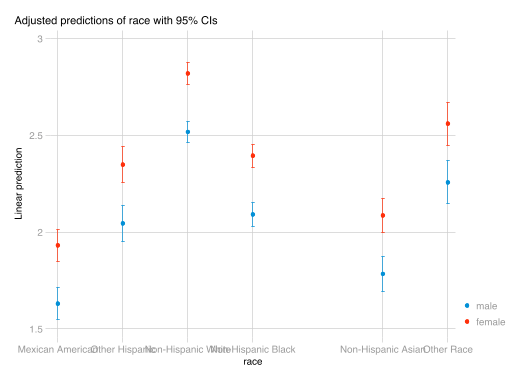

In [44]:
quietly reg hlthcarefreq i.race i.gender hlthstatus 
quietly margins i.race, over(gender) atmeans
marginsplot, recast(scatter) scheme(538w)


Variables that uniquely identify margins: raceBYsex gender


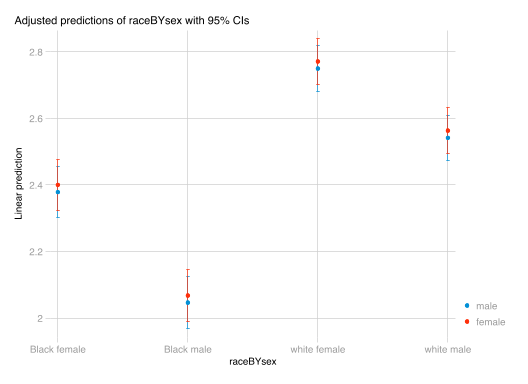

In [67]:
quietly margins i.raceBYsex, over(gender) atmeans
marginsplot, recast(scatter) scheme(538w)

## 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. Do the results support or contradict each of your hypotheses?
    
    I don't think the results contradict both of my hypotheses.
    
    B. Why do the regression coefficients support or contradict your hypotheses?
    
    These regression coefficients contradict my hypothesis and I think there's a mixture of factors at 
    hand. I'm learning, and probably made lots and lots of mistakes. I think the data could be not the 
    best selection for capturing access to healthcare (this was selected sort of at random to try out 
    merging datasets), and so hospital visits may not be the best measure of that. 
        Theoretically, if I did run all my models correctly and the data was perfect, and I still 
        got these results, it would sort of make sense to me. In my first modeled regression, it 
        appears that the most marginalized are Mexican American men. Again, applying an intersectional 
        lens, Mexican Americans in the U.S. could likely be facing the most barriers to accessing 
        healthcare based on uncertain citizenship statuses and learned machismo gender roles. Noting 
        as well that their female counterpart's CI is higher.
    
    C. Why do your regression adjusted estimates from margins for nominal categories or given 
    interval-ratio values support or contradict your hypotheses?
    Again, they contradict my hypothesis but theoretically, if I did run all my models correctly and 
        the data was perfect, and I still got these results, it would sort of make sense to me. Black 
        women are not the most marginalized group here, and in fact are sort of close to white men's 
        access to care. It's Black men who only access healthcare 1 to 2 times a year. However, this 
        makes sense by applying intersectional frameworks to understand differential impacts of gender         roles (men receiving the lower confidence intervals to their intraracial counterpart) and how 
        Black men often are told to toughen up, or maybe also not to trust medical professionals. I 
        think if I  had controlled for education, that may be a good factor to add to my model as 
        well. 